<img src="https://api-frontend.kemdikbud.go.id/v2/detail_pt_logo/ODcyMEY5MkMtREQyMi00RDU3LUI3MEItNTZDNzJFNUVGREMw" width="75"/>
<h1 id="judul"><b>Tugas Kelompok Algoritma</b></h1>
<h3>Implementasi algoritma dan studi kasus</h3>

![nama](https://img.shields.io/badge/Ketua-Muhammad%20Ali%20Pratama%20Putra-blue)
![nim](https://img.shields.io/badge/NIM-5220411416-lightgrey)
![matkul](https://img.shields.io/badge/Mata%20Kuliah-Kecerdasan%20Buatan-lightgrey)

### **Anggota kelompok**
| NIM | Nama |
| --- | --- |
| 5220411415 | M. ALI PRATAMA PUTRA |
| 5220411433 | AKHMAD ZAQI RIYADI |
| 5220411414 | M. HASBI ASHSHIDDIQI |
| 5220411419 | M. SAIFUL ANWAR |
| 5220411444 | M. ROHMAD NURYANTO |

---

## Fuzzy Logic (From Stratch)
Kami menggunakan data kecil yang digunakan pada excel

##### 1. Install library dan kebutuhan analisis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### 2. Membuka file dataset

In [ ]:
df_main = pd.DataFrame({
    "PERMINTAAN": [4000],
    "PERSEDIAAN": [300],
})
df_main

,PERMINTAAN,PERSEDIAAN
0,4000,300


##### 3. Membuat fungsi grafik untuk model segitiga dan trapesium

In [ ]:
def segitiga(x, abc):
    assert len(abc) == 3
    a, b, c = np.r_[abc]
    assert a <= b and b <= c

    y = np.zeros(len(x))

    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = (x[idx] - a) / float(b - a)

    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = (c - x[idx]) / float(c - b)

    idx = np.nonzero(x == b)
    y[idx] = 1
    return y

def trapesium(x, abcd):
    assert len(abcd) == 4
    a, b, c, d = np.r_[abcd]
    assert a <= b and b <= c and c <= d
    y = np.ones(len(x))

    idx = np.nonzero(x <= b)[0]
    y[idx] = segitiga(x[idx], np.r_[a, b, b])

    idx = np.nonzero(x >= c)[0]
    y[idx] = segitiga(x[idx], np.r_[c, c, d])

    idx = np.nonzero(x < a)[0]
    y[idx] = np.zeros(len(idx))

    idx = np.nonzero(x > d)[0]
    y[idx] = np.zeros(len(idx))

    return y

##### 4. Analisis fitur permintaan dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/562k3J5/image.png"/>

Didapatkan rentang logika fuzzy pada range 1000 sampai 5000. Tetapi kami beri interval range pada grafik sekitar 1000 untuk batas bawah, sehingga range dari 0 sampai 5000.

Sehingga diperoleh dengan diagram garis seperti dibawah

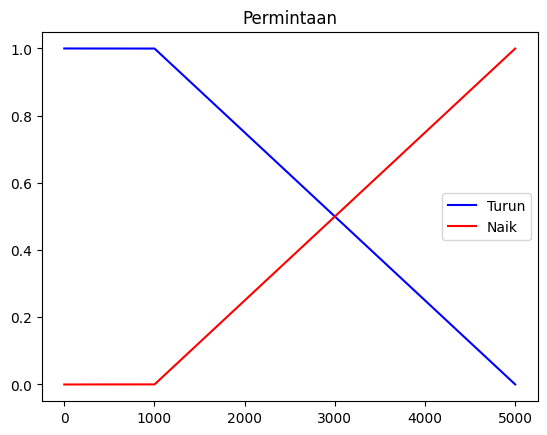

In [ ]:
x_permintaan = np.arange(0, 5000, 1)
y_permintaan_lo = [0, 0, 1000, 5000]
y_permintaan_hi = [1000, 5000, 5000]
permintaan_lo = trapesium(x_permintaan, y_permintaan_lo)
permintaan_hi = segitiga(x_permintaan, y_permintaan_hi)

plt.plot(x_permintaan, permintaan_lo, 'b', linewidth=1.5, label='Turun')
plt.plot(x_permintaan, permintaan_hi, 'r', linewidth=1.5, label='Naik')
plt.title('Permintaan')
plt.legend()
plt.show()

Membuat kolom baru pada dataframe untuk kedua derajat anggota.

In [ ]:
def derajat_anggota_turun(val):
    if val[0] <= 1000:
        return 1
    elif val[0] > 1000 and val[0] < 5000:
        return round((5000 - val[0]) / (5000 - 1000), 2)
    else:
        return 0
df_main['DA PERMINTAAN TURUN'] = df_main[['PERMINTAAN']].apply(derajat_anggota_turun, axis=1)
def derajat_anggota_naik(val):
    if val[0] <= 1000:
        return 0
    elif val[0] > 1000 and val[0] < 5000:
        return round((val[0] - 1000) / (5000 - 1000), 2)
    else:
        return 1
df_main['DA PERMINTAAN NAIK'] = df_main[['PERMINTAAN']].apply(derajat_anggota_naik, axis=1)
df_main

,PERMINTAAN,PERSEDIAAN,DA PERMINTAAN TURUN,DA PERMINTAAN NAIK
0,4000,300,0.25,0.75


##### 5. Analisis fitur persediaan dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/8B4kvVL/image.png"/>

Didapatkan rentang logika fuzzy pada range 100 sampai 600. Tetapi kami beri interval range pada grafik sekitar 100 untuk batas bawah, sehingga range dari 0 sampai 600.

Sehingga diperoleh dengan diagram garis seperti dibawah

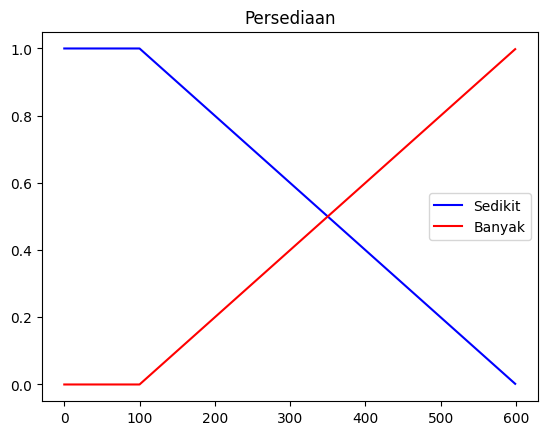

In [ ]:
x_persediaan = np.arange(0, 600, 1)
y_persediaan_lo = np.array([0, 0, 100, 600])
y_persediaan_hi = np.array([100, 600, 600])
persediaan_lo = trapesium(x_persediaan, y_persediaan_lo)
persediaan_hi = segitiga(x_persediaan, y_persediaan_hi)

plt.plot(x_persediaan, persediaan_lo, 'b', linewidth=1.5, label='Sedikit')
plt.plot(x_persediaan, persediaan_hi, 'r', linewidth=1.5, label='Banyak')
plt.title('Persediaan')
plt.legend()
plt.show()

Membuat kolom baru pada dataframe untuk kedua derajat anggota.

In [ ]:
def derajat_anggota_sedikit(val):
    if val[0] <= 100:
        return 1
    elif val[0] > 100 and val[0] < 600:
        return round((600 - val[0]) / (600 - 100), 2)
    else:
        return 0
df_main['DA PERSEDIAAN SEDIKIT'] = df_main[['PERSEDIAAN']].apply(derajat_anggota_sedikit, axis=1)
def derajat_anggota_banyak(val):
    if val[0] <= 100:
        return 0
    elif val[0] > 100 and val[0] < 600:
        return round((val[0] - 100) / (600 - 100), 2)
    else:
        return 1
df_main['DA PERSEDIAAN BANYAK'] = df_main[['PERSEDIAAN']].apply(derajat_anggota_banyak, axis=1)
df_main

,PERMINTAAN,PERSEDIAAN,DA PERMINTAAN TURUN,DA PERMINTAAN NAIK,DA PERSEDIAAN SEDIKIT,DA PERSEDIAAN BANYAK
0,4000,300,0.25,0.75,0.6,0.4


##### 6. Analisis fitur produksi dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/rvsC6Wt/image.png"/>

Didapatkan rentang logika fuzzy pada range 2000 sampai 7000. Tetapi kami beri interval range pada grafik sekitar 2000 untuk batas bawah, sehingga range dari 0 sampai 7000.

Sehingga diperoleh dengan diagram garis seperti dibawah

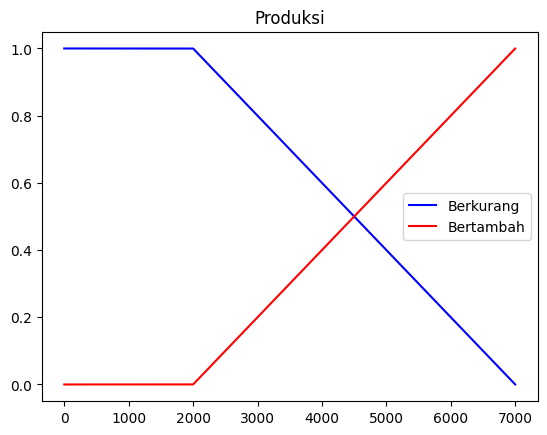

In [ ]:
x_produksi = np.arange(0, 7000, 1)
y_produksi_lo = np.array([0, 0, 2000, 7000])
y_produksi_hi = np.array([2000, 7000, 7000])
produksi_lo = trapesium(x_produksi, y_produksi_lo)
produksi_hi = segitiga(x_produksi, y_produksi_hi)

plt.plot(x_produksi, produksi_lo, 'b', linewidth=1.5, label='Berkurang')
plt.plot(x_produksi, produksi_hi, 'r', linewidth=1.5, label='Bertambah')
plt.title('Produksi')
plt.legend()
plt.show()

##### 7. Membuat aturan logika Fuzzy
Terdapat 4 aturan yang membuat keputusan akhir pada kasus ini:
<img src="https://i.ibb.co/hmNSrVj/image.png"/>

In [ ]:
def z_berkurang(val):
    alpha = min(val)
    return 7000 - ((7000 - 2000) * alpha)
def z_bertambah(val):
    alpha = min(val)
    return 2000 + ((7000 - 2000) * alpha)

df_main['R1_a'] = df_main[['DA PERMINTAAN TURUN', 'DA PERSEDIAAN BANYAK']].apply(min, axis=1)
df_main['R1'] = df_main[['DA PERMINTAAN TURUN', 'DA PERSEDIAAN BANYAK']].apply(z_berkurang, axis=1)
df_main['R2'] = df_main[['DA PERMINTAAN TURUN', 'DA PERSEDIAAN SEDIKIT']].apply(z_berkurang, axis=1)
df_main['R2_a'] = df_main[['DA PERMINTAAN TURUN', 'DA PERSEDIAAN SEDIKIT']].apply(min, axis=1)
df_main['R3'] = df_main[['DA PERMINTAAN NAIK', 'DA PERSEDIAAN BANYAK']].apply(z_bertambah, axis=1)
df_main['R3_a'] = df_main[['DA PERMINTAAN NAIK', 'DA PERSEDIAAN BANYAK']].apply(min, axis=1)
df_main['R4'] = df_main[['DA PERMINTAAN NAIK', 'DA PERSEDIAAN SEDIKIT']].apply(z_bertambah, axis=1)
df_main['R4_a'] = df_main[['DA PERMINTAAN NAIK', 'DA PERSEDIAAN SEDIKIT']].apply(min, axis=1)
df_main

,PERMINTAAN,PERSEDIAAN,DA PERMINTAAN TURUN,DA PERMINTAAN NAIK,DA PERSEDIAAN SEDIKIT,DA PERSEDIAAN BANYAK,R1_a,R1,R2,R2_a,R3,R3_a,R4,R4_a
0,4000,300,0.25,0.75,0.6,0.4,0.25,5750.0,5750.0,0.25,4000.0,0.4,5000.0,0.6


##### 8. Kalkulasi COA berdasarkan aturan yang diberikan
COA (Centered of Average) dapat dihitung dengan rumus berikut:
<img src="https://i.ibb.co/RQ9cz26/image.png"/>

In [ ]:
coa = df_main[['R1', 'R2', 'R3', 'R4']].apply(lambda x: x[0] * df_main['R1_a'] + x[1] * df_main['R2_a'] + x[2] * df_main['R3_a'] + x[3] * df_main['R4_a'], axis=1) / df_main[['R1_a', 'R2_a', 'R3_a', 'R4_a']].sum().sum()
coa

,0
0,4983.333333


## Fuzzy Logic (Library Scikit-Fuzzy)
Kami menggunakan dataset csv yang diextract dari excel:
https://cdn.jsdelivr.net/gh/aliepratama/kuliah-final-kecerdasan-buatan/tahani.csv

##### 1. Install library dan kebutuhan analisis

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=ae4fb9f17265ce368d67d0b7b571744508282d837ff53f7a247d2faa66d9ae7e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


##### 2. Membuka file dataset

In [ ]:
url = 'https://cdn.jsdelivr.net/gh/aliepratama/kuliah-final-kecerdasan-buatan/tahani.csv'
df_karyawan = pd.DataFrame(pd.read_csv(url))
df_karyawan

,NO,NAMA,TGL LAHIR,THN MASUK,GAJI,UMUR,MASA KERJA
0,1,Lia,03/06/72,1996,"Rp.750,000",30,6
1,2,Iwan,23/09/54,1985,"Rp.1,500,000",48,17
2,3,Sari,12/12/66,1988,"Rp.1,250,000",36,14
3,4,Andi,06/03/65,1998,"Rp.1,040,000",37,4
4,5,Budi,04/12/60,1990,"Rp.950,000",42,12
5,6,Amir,18/11/63,1989,"Rp.1,600,000",39,13
6,7,Rian,28/05/65,1997,"Rp.1,250,000",37,5
7,8,Kiki,09/07/71,2001,"Rp.550,000",31,1
8,9,Alda,14/08/67,1999,"Rp.735,000",35,3
9,10,Yoga,17/09/77,2000,"Rp.860,000",25,2


##### 3. Mengecek kelengkapan data

In [ ]:
df_karyawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          10 non-null     int64 
 1   NAMA        10 non-null     object
 2   TGL LAHIR   10 non-null     object
 3   THN MASUK   10 non-null     int64 
 4   GAJI        10 non-null     object
 5   UMUR        10 non-null     int64 
 6   MASA KERJA  10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


##### 4. Memperbaiki format data

In [ ]:
df_karyawan['GAJI'] = df_karyawan['GAJI'].apply(lambda x: int(x.replace('Rp.', '').replace(',', '')))
df_karyawan['GAJI'].dtype

dtype('int64')

##### 5. Pemisahan fitur pada dataset (tujuannya agar lebih mudah dalam menganalisis data)

In [ ]:
data_umur = df_karyawan[['NO', 'UMUR']]
data_masa_kerja = df_karyawan[['NO', 'MASA KERJA']]
data_gaji = df_karyawan[['NO', 'GAJI']]

##### 6. Analisis fitur umur dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/r3RQtgd/image.png"/>

Didapatkan rentang logika fuzzy pada range 30 sampai 50. Tetapi kami beri interval range pada grafik sekitar 10 per batasnya, sehingga range dari 20 sampai 60.

Sehingga diperoleh dengan diagram garis seperti dibawah

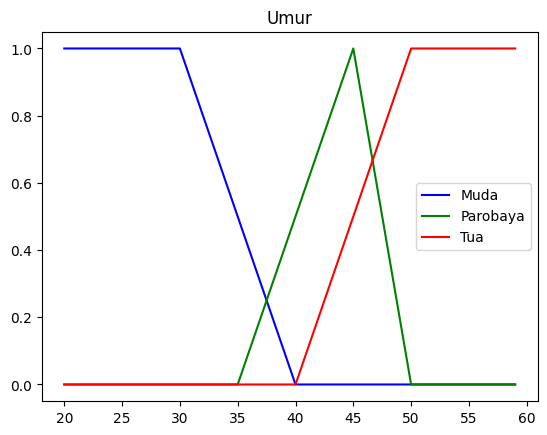

In [ ]:
x_umur = np.arange(20, 60, 1)
umur_lo = fuzz.trapmf(x_umur, [20, 20, 30, 40])
umur_md = fuzz.trimf(x_umur, [35, 45, 50])
umur_hi = fuzz.trapmf(x_umur, [40, 50, 60, 60])

plt.plot(x_umur, umur_lo, 'b', linewidth=1.5, label='Muda')
plt.plot(x_umur, umur_md, 'g', linewidth=1.5, label='Parobaya')
plt.plot(x_umur, umur_hi, 'r', linewidth=1.5, label='Tua')
plt.title('Umur')
plt.legend()
plt.show()

Membuat kolom baru pada dataframe untuk ketiga derajat anggota.

In [ ]:
data_umur['DERAJAT ANGGOTA MUDA'] = fuzz.interp_membership(x_umur, umur_lo, data_umur['UMUR'])
data_umur['DERAJAT ANGGOTA PAROBAYA'] = fuzz.interp_membership(x_umur, umur_md, data_umur['UMUR'])
data_umur['DERAJAT ANGGOTA TUA'] = fuzz.interp_membership(x_umur, umur_hi, data_umur['UMUR'])
data_umur

,NO,UMUR,DERAJAT ANGGOTA MUDA,DERAJAT ANGGOTA PAROBAYA,DERAJAT ANGGOTA TUA
0,1,30,1.0,0.0,0.0
1,2,48,0.0,0.4,0.8
2,3,36,0.4,0.1,0.0
3,4,37,0.3,0.2,0.0
4,5,42,0.0,0.7,0.2
5,6,39,0.1,0.4,0.0
6,7,37,0.3,0.2,0.0
7,8,31,0.9,0.0,0.0
8,9,35,0.5,0.0,0.0
9,10,25,1.0,0.0,0.0


Membuat klasifikasi kategori berdasarkan derajat anggota dan disimpan dalam kolom baru

In [ ]:
def status(derajat):
    if derajat[0] > derajat[1] and derajat[0] > derajat[2]:
        return 'MUDA'
    elif derajat[1] > derajat[0] and derajat[1] > derajat[2]:
        return 'PAROBAYA'
    elif derajat[2] > derajat[0] and derajat[2] > derajat[1]:
        return 'TUA'

data_umur['STATUS UMUR'] = data_umur[['DERAJAT ANGGOTA MUDA', 'DERAJAT ANGGOTA PAROBAYA', 'DERAJAT ANGGOTA TUA']].apply(status, axis=1)
data_umur

,NO,UMUR,DERAJAT ANGGOTA MUDA,DERAJAT ANGGOTA PAROBAYA,DERAJAT ANGGOTA TUA,STATUS UMUR
0,1,30,1.0,0.0,0.0,MUDA
1,2,48,0.0,0.4,0.8,TUA
2,3,36,0.4,0.1,0.0,MUDA
3,4,37,0.3,0.2,0.0,MUDA
4,5,42,0.0,0.7,0.2,PAROBAYA
5,6,39,0.1,0.4,0.0,PAROBAYA
6,7,37,0.3,0.2,0.0,MUDA
7,8,31,0.9,0.0,0.0,MUDA
8,9,35,0.5,0.0,0.0,MUDA
9,10,25,1.0,0.0,0.0,MUDA


##### 7. Analisis fitur masa kerja dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/YTZdYbc/image.png"/>

Didapatkan rentang logika fuzzy pada range 5 sampai 25. Tetapi kami beri interval range pada grafik sekitar 5 per batasnya, sehingga range dari 0 sampai 30.

Sehingga diperoleh dengan diagram garis seperti dibawah

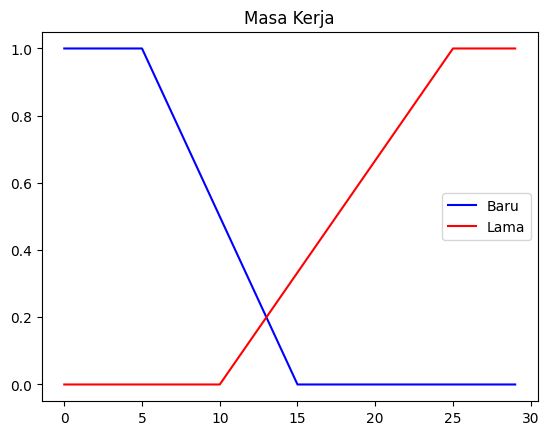

In [ ]:
x_masa_kerja = np.arange(0, 30, 1)
masa_kerja_lo = fuzz.trapmf(x_masa_kerja, [0, 0, 5, 15])
masa_kerja_hi = fuzz.trapmf(x_masa_kerja, [10, 25, 30, 30])

plt.plot(x_masa_kerja, masa_kerja_lo, 'b', linewidth=1.5, label='Baru')
plt.plot(x_masa_kerja, masa_kerja_hi, 'r', linewidth=1.5, label='Lama')
plt.title('Masa Kerja')
plt.legend()
plt.show()

Membuat kolom baru pada dataframe untuk kedua derajat anggota.

In [ ]:
data_masa_kerja['DERAJAT ANGGOTA BARU'] = fuzz.interp_membership(x_masa_kerja, masa_kerja_lo, data_masa_kerja['MASA KERJA'])
data_masa_kerja['DERAJAT ANGGOTA LAMA'] = fuzz.interp_membership(x_masa_kerja, masa_kerja_hi, data_masa_kerja['MASA KERJA'])
data_masa_kerja

,NO,MASA KERJA,DERAJAT ANGGOTA BARU,DERAJAT ANGGOTA LAMA
0,1,6,0.9,0.000000
1,2,17,0.0,0.466667
2,3,14,0.1,0.266667
3,4,4,1.0,0.000000
4,5,12,0.3,0.133333
5,6,13,0.2,0.200000
6,7,5,1.0,0.000000
7,8,1,1.0,0.000000
8,9,3,1.0,0.000000
9,10,2,1.0,0.000000


Membuat klasifikasi kategori berdasarkan derajat anggota dan disimpan dalam kolom baru

In [ ]:
def status(derajat):
    if derajat[0] > derajat[1]:
        return 'BARU'
    elif derajat[1] > derajat[0]:
        return 'LAMA'
    return 'LAMA'

data_masa_kerja['STATUS MASA KERJA'] = data_masa_kerja[['DERAJAT ANGGOTA BARU', 'DERAJAT ANGGOTA LAMA']].apply(status, axis=1)
data_masa_kerja

,NO,MASA KERJA,DERAJAT ANGGOTA BARU,DERAJAT ANGGOTA LAMA,STATUS MASA KERJA
0,1,6,0.9,0.000000,BARU
1,2,17,0.0,0.466667,LAMA
2,3,14,0.1,0.266667,LAMA
3,4,4,1.0,0.000000,BARU
4,5,12,0.3,0.133333,BARU
5,6,13,0.2,0.200000,LAMA
6,7,5,1.0,0.000000,BARU
7,8,1,1.0,0.000000,BARU
8,9,3,1.0,0.000000,BARU
9,10,2,1.0,0.000000,BARU


##### 8. Analisis fitur umur dengan logika fuzzy
Kami mengikuti konfigurasi yang diberikan soal, sepeti di gambar berikut:
<img src="https://i.ibb.co/yWQC9hS/image.png"/>

Didapatkan rentang logika fuzzy pada range Rp300.000 sampai Rp2.000.000.

Sehingga diperoleh dengan diagram garis seperti dibawah

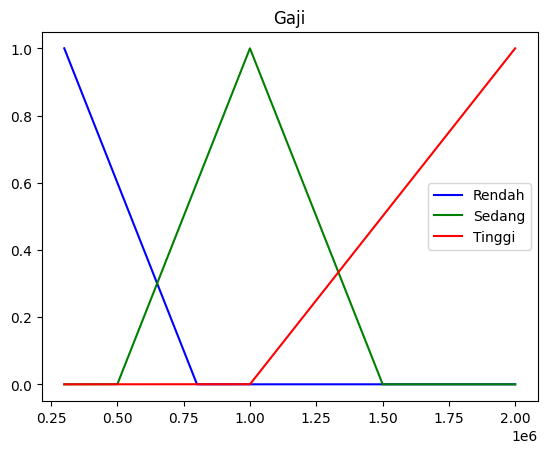

In [ ]:
x_gaji = np.arange(300000, 2000000, 1)
gaji_lo = fuzz.trimf(x_gaji, [300000, 300000, 800000])
gaji_md = fuzz.trimf(x_gaji, [500000, 1000000, 1500000])
gaji_hi = fuzz.trimf(x_gaji, [1000000, 2000000, 2000000])

plt.plot(x_gaji, gaji_lo, 'b', linewidth=1.5, label='Rendah')
plt.plot(x_gaji, gaji_md, 'g', linewidth=1.5, label='Sedang')
plt.plot(x_gaji, gaji_hi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Gaji')
plt.legend()
plt.show()

Membuat kolom baru pada dataframe untuk ketiga derajat anggota.

In [ ]:
data_gaji['DERAJAT ANGGOTA RENDAH'] = fuzz.interp_membership(x_gaji, gaji_lo, data_gaji['GAJI'])
data_gaji['DERAJAT ANGGOTA SEDANG'] = fuzz.interp_membership(x_gaji, gaji_md, data_gaji['GAJI'])
data_gaji['DERAJAT ANGGOTA TINGGI'] = fuzz.interp_membership(x_gaji, gaji_hi, data_gaji['GAJI'])
data_gaji

,NO,GAJI,DERAJAT ANGGOTA RENDAH,DERAJAT ANGGOTA SEDANG,DERAJAT ANGGOTA TINGGI
0,1,750000,0.10,0.50,0.00
1,2,1500000,0.00,0.00,0.50
2,3,1250000,0.00,0.50,0.25
3,4,1040000,0.00,0.92,0.04
4,5,950000,0.00,0.90,0.00
5,6,1600000,0.00,0.00,0.60
6,7,1250000,0.00,0.50,0.25
7,8,550000,0.50,0.10,0.00
8,9,735000,0.13,0.47,0.00
9,10,860000,0.00,0.72,0.00


Membuat klasifikasi kategori berdasarkan derajat anggota dan disimpan dalam kolom baru

In [ ]:
def status(derajat):
    if derajat[0] > derajat[1] and derajat[0] > derajat[2]:
        return 'RENDAH'
    elif derajat[1] > derajat[0] and derajat[1] > derajat[2]:
        return 'SEDANG'
    elif derajat[2] > derajat[0] and derajat[2] > derajat[1]:
        return 'TINGGI'

data_gaji['STATUS GAJI'] = data_gaji[['DERAJAT ANGGOTA RENDAH', 'DERAJAT ANGGOTA SEDANG', 'DERAJAT ANGGOTA TINGGI']].apply(status, axis=1)
data_gaji

,NO,GAJI,DERAJAT ANGGOTA RENDAH,DERAJAT ANGGOTA SEDANG,DERAJAT ANGGOTA TINGGI,STATUS GAJI
0,1,750000,0.10,0.50,0.00,SEDANG
1,2,1500000,0.00,0.00,0.50,TINGGI
2,3,1250000,0.00,0.50,0.25,SEDANG
3,4,1040000,0.00,0.92,0.04,SEDANG
4,5,950000,0.00,0.90,0.00,SEDANG
5,6,1600000,0.00,0.00,0.60,TINGGI
6,7,1250000,0.00,0.50,0.25,SEDANG
7,8,550000,0.50,0.10,0.00,RENDAH
8,9,735000,0.13,0.47,0.00,SEDANG
9,10,860000,0.00,0.72,0.00,SEDANG


##### 9. Join antar dataframe

In [ ]:
data_join = data_umur.join(data_masa_kerja[['NO', 'STATUS MASA KERJA']], rsuffix='l').drop('NOl', axis=1)
data_join = data_join.join(data_gaji[['NO', 'STATUS GAJI']], rsuffix='l').drop('NOl', axis=1)
data_join = data_join.drop(['DERAJAT ANGGOTA MUDA', 'DERAJAT ANGGOTA PAROBAYA', 'DERAJAT ANGGOTA TUA', 'UMUR'], axis=1)
data_join

,NO,STATUS UMUR,STATUS MASA KERJA,STATUS GAJI
0,1,MUDA,BARU,SEDANG
1,2,TUA,LAMA,TINGGI
2,3,MUDA,LAMA,SEDANG
3,4,MUDA,BARU,SEDANG
4,5,PAROBAYA,BARU,SEDANG
5,6,PAROBAYA,LAMA,TINGGI
6,7,MUDA,BARU,SEDANG
7,8,MUDA,BARU,RENDAH
8,9,MUDA,BARU,SEDANG
9,10,MUDA,BARU,SEDANG


##### 10. Membuat aturan untuk klasifikasi

Pada excel tersedia aturan seperti di gambar:
<img src="https://i.ibb.co/RDTvxtm/image.png"/>

Kami golongkan dari kiri ke kanan menjadi
1. Karyawan 1
2. Karyawan 2
3. Karyawan 3
4. Karyawan 4
5. Selain itu, tidak diketahui

In [ ]:
def penggolongan_karyawan(kolom):
    if kolom[0] == 'MUDA' and kolom[2] == 'TINGGI':
        return 'KARYAWAN 1'
    elif kolom[0] == 'MUDA' or kolom[2] == 'TINGGI':
        return 'KARYAWAN 2'
    elif kolom[0] == 'MUDA' and kolom[1] == 'LAMA':
        return 'KARYAWAN 3'
    elif kolom[0] == 'PAROBAYA' and kolom[2] == 'SEDANG':
        return 'KARYAWAN 4'
    elif kolom[0] == 'PAROBAYA' and kolom[1] == 'LAMA':
        return 'KARYAWAN 4'
    else:
        return 'TIDAK DIKETAHUI'

data_join['JENIS KARYAWAN'] = data_join[['STATUS UMUR', 'STATUS MASA KERJA', 'STATUS GAJI']].apply(penggolongan_karyawan, axis=1)
data_join

,NO,STATUS UMUR,STATUS MASA KERJA,STATUS GAJI,JENIS KARYAWAN
0,1,MUDA,BARU,SEDANG,KARYAWAN 2
1,2,TUA,LAMA,TINGGI,KARYAWAN 2
2,3,MUDA,LAMA,SEDANG,KARYAWAN 2
3,4,MUDA,BARU,SEDANG,KARYAWAN 2
4,5,PAROBAYA,BARU,SEDANG,KARYAWAN 4
5,6,PAROBAYA,LAMA,TINGGI,KARYAWAN 2
6,7,MUDA,BARU,SEDANG,KARYAWAN 2
7,8,MUDA,BARU,RENDAH,KARYAWAN 2
8,9,MUDA,BARU,SEDANG,KARYAWAN 2
9,10,MUDA,BARU,SEDANG,KARYAWAN 2
